### Dependencies

In [1]:
import matplotlib as mpl
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter

new_rc_paramas = {
    'text.usetex' : True,
    'figure.dpi' : 180,
    'text.latex.preamble' : r'\usepackage{libertine}'r'\usepackage{libertinust1math}',
    'font.family' : 'Linux Libertine',
    'axes.titlesize' : 22,
    'axes.labelsize' : 18,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'xtick.top' : True,
    'ytick.right' : True,
    'legend.fontsize' : 'large',
    'axes.linewidth' : 1.2,
    'savefig.bbox' : 'tight',
    'image.aspect' : 'equal',
}

Oh2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^2)$')
Oh3 = mlines.Line2D([], [], color='black', linestyle="-.", label=r'$\mathcal{O}(h^3)$')
Oh1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h)$')
Ohneg2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-2})$')
Ohneg1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-1})$')
Odt = mlines.Line2D([], [], color='black', linestyle="--", label=r'$\mathcal{O}(\Delta t)$')
Odt2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(\Delta t^2)$')
tau1 = mlines.Line2D([], [], color='C4', linestyle="--", label=r'$\tau_0 = \tau_1 = 1$')
tau10neg4 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-4}$')
tau10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-3}$')
tau3x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-3}$')
tau5x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-3}$')
tau3x10neg4 = mlines.Line2D([], [], color='C2', linestyle="-.", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-4}$')
tau5x10neg4 = mlines.Line2D([], [], color='C3', linestyle=":", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-4}$')

conservative = mlines.Line2D([0], [0], marker='None', color='black', linestyle=":", label='Conservative')
classical = mlines.Line2D([0], [0], marker='None', color='black', linestyle=(0, (5,7)), label='Non-conservative')


space = mlines.Line2D([0], [0], marker='None', color='None', linestyle="None", label=' ')

circle = mlines.Line2D([0], [0], marker='o', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Full stabilization.')
                          
star = mlines.Line2D([], [], color='black', marker='*',
                          markersize=9,linestyle="None",
                        markeredgewidth=0.8, markerfacecolor="None", 
                        label='Macro stabilization.')

triangle = mlines.Line2D([0], [0], marker='^', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Macro stab. 2')


import matplotlib.pyplot as plt

mpl.rcParams.update(new_rc_paramas)

import numpy as np

def convergence_rate(errors, mesh_sizes):
    if len(errors) < 2 or len(mesh_sizes) < 2 or len(errors) != len(mesh_sizes):
        raise ValueError("At least two errors and mesh sizes are required.")

    # Take logarithm of errors and mesh sizes
    log_errors = np.log(errors)
    log_mesh_sizes = np.log(mesh_sizes)

    # Compute differences between consecutive elements
    delta_errors = np.diff(log_errors)
    delta_mesh_sizes = np.diff(log_mesh_sizes)

    # Compute convergence rate
    convergence_rates = delta_errors / delta_mesh_sizes

    return convergence_rates


### $L^2$-Error vs $h$, $\Delta t_n \propto h$

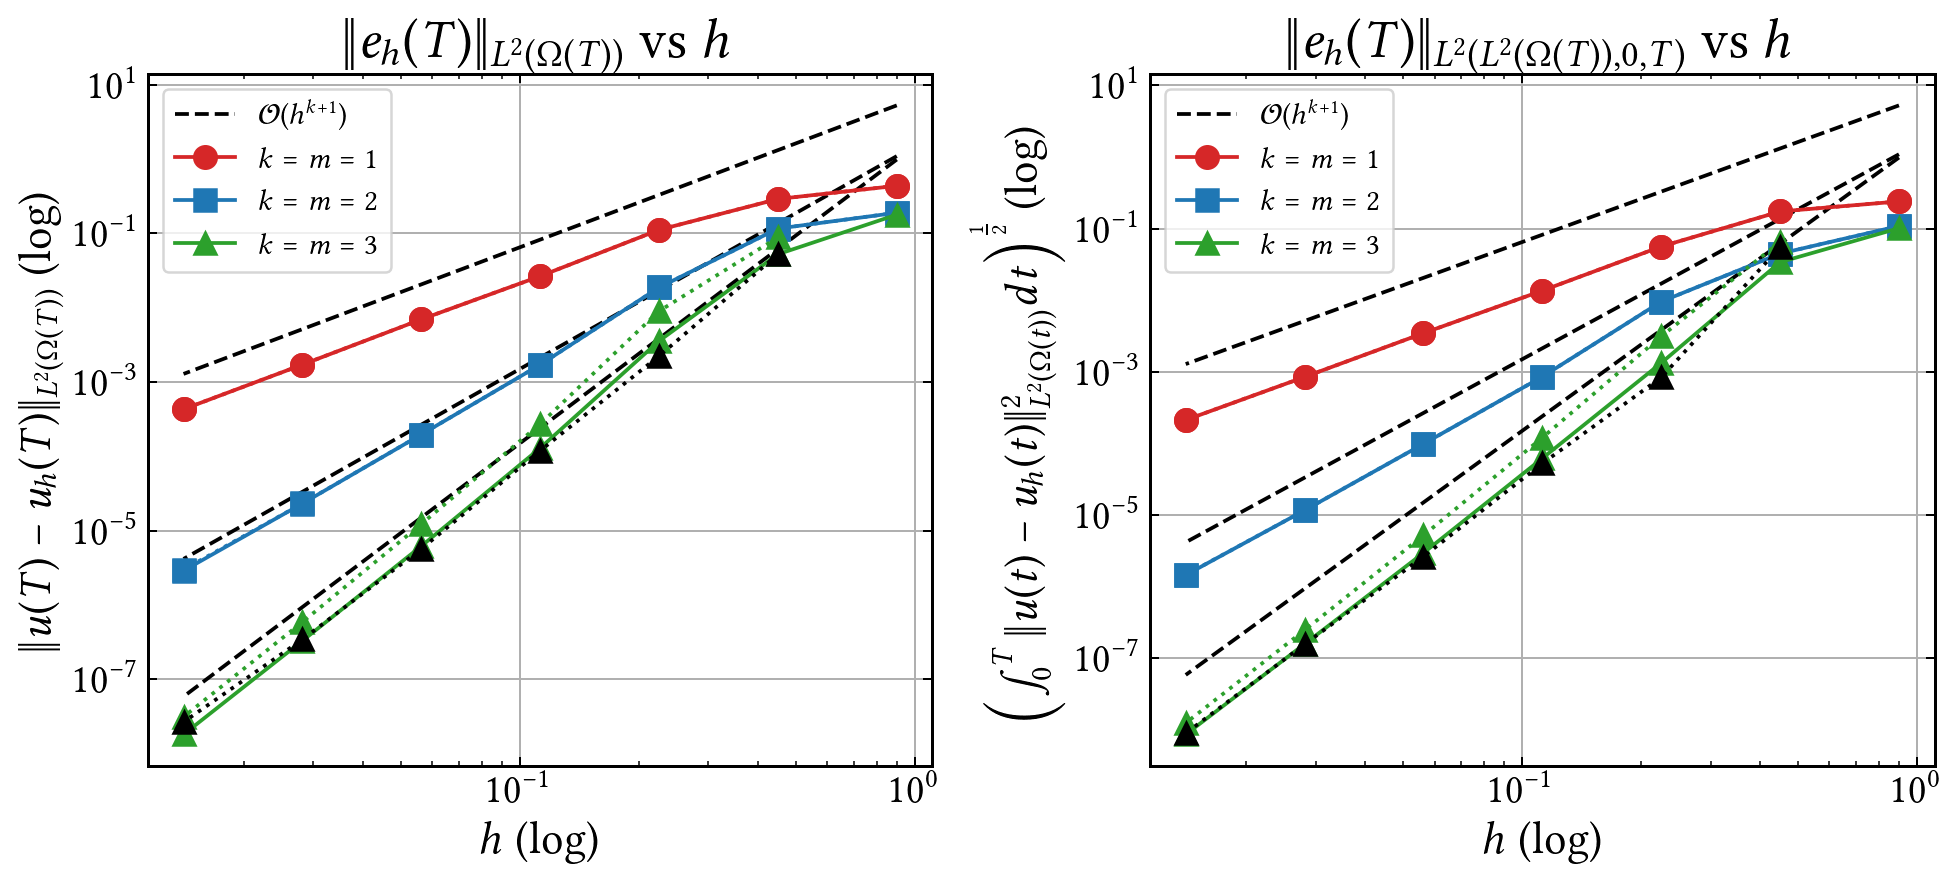

In [15]:
# paper.cpp

# N = 5, T = 0.5, tau = 0.05          (N = 7, T = 0.5, tau = 0.05)
error_conservative_P1P1_fullstab = [0.4365153106112308, 0.2898064078705567, 0.1113592610838751, 0.02655202195257195, 0.006961509248679553, 0.001713850366706329, 0.0004303969524323837]     #[0.9103922923112666, 0.6831133501255253, 0.1790694186989171, 0.05580567115696776, 0.01339335764314571, 0.003331764718875724, 0.0008076682052737521, 0.0001998769950510804]
error_conservative_P1P1_fullstab_T = [0.2399844512870005, 0.1737865860620138, 0.05626751857512142, 0.01362911236063028, 0.003471362588949394, 0.0008499061716762681, 0.0002125815574841851]   #[0.4582848214356584, 0.2856321446808385, 0.08177771419499358, 0.02530536992930246, 0.006233718785223333, 0.001521292228672025, 0.0003677946941598954, 9.060962291039232e-05]


error_classical_P1P1_fullstab = [0.4365143535336542, 0.2898077607378138, 0.1113600556783265, 0.026550194252831, 0.006961547469905588, 0.001713853157808854, 0.0004304024297899049]
error_classical_P1P1_fullstab_T = [0.2399844669792725, 0.1737866377505871, 0.05626796965920463, 0.01362876414504416, 0.003471368444328523, 0.0008499083517560675, 0.0002125814790695886]

#error_classical_P1P1_macro = 
#error_conservative_P1P1_macro =

error_conservative_P2P2_fullstab = [0.1895122151981659, 0.1158770771340701, 0.01869277856121433, 0.001706983700100381, 0.000196770281278793, 2.322672062381524e-05, 2.995914662689307e-06]
error_conservative_P2P2_fullstab_T = [0.1089640006945107, 0.04484162527301599, 0.009568147191179934, 0.000856035482564056, 9.86893745578454e-05, 1.166423071467183e-05, 1.460431897765668e-06]

error_classical_P2P2_fullstab = [0.1892836185111857, 0.1158777992384305, 0.01869275277968551, 0.001706961051116659, 0.0001966357110851696, 2.318111554261033e-05, 2.89421597255961e-06]
error_classical_P2P2_fullstab_T = [0.1089487598507126, 0.0448415805423322, 0.009568120722121019, 0.0008560330213553946, 9.868692070223084e-05, 1.16578533480373e-05, 1.455588305881416e-06]

# rerunning with beta = P3quad
#error_conservative_P3P3_fullstab = [0.179127333041205, 0.07053136455529413, 0.003191179321871954, 0.0001254136578807295, 8.382670107117773e-06, 1.495845279993525e-06]
#error_conservative_P3P3_fullstab_T = [0.1019302761543279, 0.03245310744034126, 0.001646591228800438, 5.800232499907066e-05, 3.106883564584576e-06, 3.37947411760855e-07]

# running N = 9 in space and time and SUPG stabilization 0.1*h^4/D
# error_conservative_P3P3_fullstab = ### mac
# error_conservative_P3P3_fullstab_T = ### mac

# classical with same mesh as above (same as in Lehrenfelds paper) and with N=9 space & time, P2quad 
error_classical_P3P3_fullstab = [0.178325528217856, 0.05229872840897468, 0.003564189247300313, 0.0001292324015907654, 6.19993935760981e-06, 3.303333643934042e-07, 1.81483498892827e-08]
error_classical_P3P3_fullstab_T = [0.1015171229457153, 0.03404335462275743, 0.001332102383047849, 6.212872805788408e-05, 2.961929990613256e-06, 1.583174498132536e-07, 8.642296048661413e-09]


# rerunning with beta exact 
#error_conservative_P3P3_fullstab = ### terminal was killed but it was exactly like the above
#error_conservative_P3P3_fullstab_T = ### terminal was killed but it was exactly like the above

# rerunning with beta exact and original domain
#error_conservative_P3P3_fullstab = [0.17812, 0.0522642, 0.00356433, 0.000129045, 9.68056e-06, 2.70486e-06]   
#error_conservative_P3P3_fullstab_T = [0.101522, 0.0340443, 0.00133207, 6.21314e-05, 3.05506e-06, 2.64819e-07] 
#nb_active_elements = ### ross screen 134753.pts-2.ross (killed)

# rerunning with N=14 in time and N=9 in space, beta = P0quad and tau=0.05 (Fuck this was on the Example 3 mesh using Example3::R0 etc... and fucked up by parallel)
# error_conservative_P3P3_fullstab = [0.1791273478231521, 0.07053116019834374, 0.003191150551830357, 0.0001248363768286654, 6.754451898837258e-06, 4.110675146722323e-07]
# error_conservative_P3P3_fullstab_T = [0.03772295839571738, 0.02649206575668251, 0.0007360720193343385, 2.853532179016198e-05, 1.504289861579254e-06, 8.528395464161896e-08]

# doing above again.. (rerunning with N=14 in time and N=9 in space, beta = P0quad and tau=0.05 
# error_conservative_P3P3_fullstab = [0.1781020254810474, 0.05225915062547705, 0.00356421993701218, 0.0001292763498791855, 6.47622562298045e-06, 1.288427985623953e-06]
# error_conservative_P3P3_fullstab_T = [0.101523176633384, 0.03404434733352005, 0.001332087461368785, 6.213668799987077e-05, 2.972968927745563e-06, 1.676111501814246e-07]

# # rerunning with N=14 in time and N=5 in space, beta = P0quad and tau=0.05
# error_conservative_P3P3_fullstab = [0.1868995233847733, 0.07048726702154523, 0.003200783498799771, 0.0001248763955040864, 6.764456295641687e-06, 4.16624630033087e-07]
# error_conservative_P3P3_fullstab_T = [0.1029278267884057, 0.03242935798207935, 0.001648318316116851, 5.793929543324433e-05, 3.070586408758764e-06, 1.715999797092991e-07]

# # rerunning with N=14 in time and N=5 in space, beta = P2quad and tau=0.05
# error_conservative_P3P3_fullstab = [0.1763758305108998, 0.05155323173998781, 0.003559951606669123, 0.0001295459556190795, 6.508043542787653e-06, 1.309195951005456e-06]
# error_conservative_P3P3_fullstab_T = [0.1024839361016894, 0.03395595401969241, 0.00133299791789543, 6.219771669258607e-05, 2.979873033310063e-06, 1.762305858579815e-07]


# running with N=14 in time, N=5 in space, beta = P0quad and tau=0.05 but with stabilization of mass matrix in lastquad using tau=tau1/10000
# error_conservative_P3P3_fullstab =  [0.1761720629301505, 0.05288432829984351, 0.003794762180828167, 0.0001364231552453792, 6.712536446057492e-06, 1.305921823931484e-06]
# error_conservative_P3P3_fullstab_T = [0.101152159455431, 0.03430510339943142, 0.001939791419777143, 6.434664677618464e-05, 3.058508735964604e-06, 1.696096142219493e-07]

# running with N=14 in time, N=5 in space, beta = P0quad and tau=0.05 but with stabilization of mass matrix in first quad using tau=tau1/10000
# error_conservative_P3P3_fullstab = [0.1761640486598434, 0.05282868099814251, 0.003787637181331056, 0.0001362124406418598, 6.705663292405887e-06, 1.304731768881709e-06]
# error_conservative_P3P3_fullstab_T = [0.1011518961443256, 0.03430464586553075, 0.001939751714685535, 6.434574839429475e-05, 3.058478670221229e-06, 1.696089565645089e-07]

# conclusion from the above two: there is not qualitative difference between stabilizing the mass matrix in the last or first time quadrature points,
# hence it seems like this is not a good solution 

### try stabilizing in itq=0

### exact Neumann condition, N=9 in space and time
# error_conservative_P3P3_fullstab = [0.1781201141030459, 0.05226421178156902, 0.003564331817726098, 0.0001290447403406007, 9.68056240029167e-06, 2.704863654452539e-06]
# error_conservative_P3P3_fullstab_T = [0.1015221914312615, 0.03404425715205159, 0.001332074738793409, 6.213144173526279e-05, 3.055058107586987e-06, 2.648193430778231e-07]



active_mesh = [2, 9, 20, 78, 282, 1073]



# error_classical_P3P3_fullstab = [0.178952, 0.0705313, 0.00319115, 0.000124745, 6.3232e-06, 3.18756e-07] 
# error_classical_P3P3_fullstab_T = [0.10192, 0.0324531, 0.00164659, 5.79062e-05, 3.05755e-06, 1.53552e-07]

### N=9 in time, but dT = h/5 
#error_conservative_P3P3_fullstab = [0.1781201141032618, 0.05236828285071919, 0.002531807904139531, 0.0001246314960162013, 8.127226385725325e-06, 2.037770456230245e-06, 4.870248545283136e-08]
#error_conservative_P3P3_fullstab_T = [0.1015221914312981, 0.03403350097736819, 0.00124649071796089, 6.072551666938643e-05, 2.902872642326007e-06, 1.948837275887673e-07, 4.128515608289123e-08]
dT = [0.25, 0.1, 0.04545454545454546, 0.02272727272727273, 0.01136363636363636, 0.005681818181818182, 0.002824858757062147]
active_mesh = [2, 6, 23, 80, 287, 1066, 4114]





h_ = [0.9, 0.45, 0.225, 0.1125, 0.05625, 0.028125, 0.01988737822087165]  
h = [0.9, 0.45, 0.225, 0.1125, 0.05625, 0.028125, 0.0140625]
dT = [0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625]
nx = [4, 7, 14, 27, 54, 107, 214, 427]
ny = [4, 7, 14, 27, 54, 107, 214, 427]


#print(convergence_rate(error_conservative_P3P3_fullstab, h_))
#print(convergence_rate(error_conservative_P3P3_fullstab_T, h_))
# print(convergence_rate(error_conservative_P3P3_macro, h_[:6]))
# print(convergence_rate(error_conservative_P3P3_macro_T, h_[:6]))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

ax1.loglog(h, 6.5*np.power(h, 2), linestyle="--", color="black")   
ax1.loglog(h, 1.5*np.power(h, 3), linestyle="--", color="black")   
ax1.loglog(h, 1.5*np.power(h, 4),label=r"$\mathcal{O}(h^{k+1})$", linestyle="--", color="black")   

ax1.loglog(h, error_conservative_P1P1_fullstab, marker='o', markersize=9, linestyle=":", color="C3")
ax1.loglog(h, error_classical_P1P1_fullstab, label= r"$k=m=1$", marker='o', markersize=9, linestyle="-", color="C3")

ax1.loglog(h, error_conservative_P2P2_fullstab, marker='s', markersize=9, linestyle=":", color="C0")
ax1.loglog(h, error_classical_P2P2_fullstab, label= r"$k=m=2$", marker='s', markersize=9, linestyle="-", color="C0")

ax1.loglog(h, error_classical_P3P3_fullstab, label= r"$k=m=3$", marker='^', markersize=9, linestyle="-", color="C2")

#ax1.set_ylim(1e-4, 2)
#ax1.set_yticks([1e-8, 1e-6, 1e-4, 1e-2, 1e0])
ax1.set_xlabel(r"$h$ (log)")
ax1.tick_params(axis='both', which='major')
ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{L^2(\Omega(T))}$ (log)")
ax1.set_title(r"$\|e_h(T)\|_{L^2(\Omega(T))}$ vs $h$")
ax1.legend()
ax1.grid()

ax2.loglog(h, 6.5*np.power(h, 2), linestyle="--", color="black")   
ax2.loglog(h, 1.5*np.power(h, 3), linestyle="--", color="black")   
ax2.loglog(h, 1.5*np.power(h, 4),label=r"$\mathcal{O}(h^{k+1})$", linestyle="--", color="black")   

ax2.loglog(h, error_conservative_P1P1_fullstab_T, marker='o', markersize=9, linestyle=":", color="C3")
ax2.loglog(h, error_classical_P1P1_fullstab_T, label= r"$k=m=1$", marker='o', markersize=9, linestyle="-", color="C3")

ax2.loglog(h, error_conservative_P2P2_fullstab_T, marker='s', markersize=9, linestyle=":", color="C0")
ax2.loglog(h, error_classical_P2P2_fullstab_T, label= r"$k=m=2$", marker='s', markersize=9, linestyle="-", color="C0")

ax2.loglog(h, error_classical_P3P3_fullstab_T, label= r"$k=m=3$", marker='^', markersize=9, linestyle="-", color="C2")

# N = 9 in space and time, tau = 0.05
# error_conservative_P3P3_fullstab = [0.179127, 0.0705314, 0.00319118, 0.000125414, 8.38267e-06, 1.49585e-06, 2.746358086669124e-07]  
# error_conservative_P3P3_fullstab_T = [0.10193, 0.0324531, 0.00164659, 5.80023e-05, 3.10688e-06, 3.37947e-07, 1.440369730083868e-07] 
# ax1.loglog(h_, error_conservative_P3P3_fullstab, marker='^', markersize=9, linestyle=":", color="C2")
# ax2.loglog(h_, error_conservative_P3P3_fullstab_T, marker='^', markersize=9, linestyle=":", color="C2")

# N = 9 in space and time, tau = 0.05 
# error_conservative_P3P3_fullstab = [0.05226421178157441, 0.003564331817721629, 0.0001290447403334119, 9.680562381874145e-06, 2.704863659076748e-06, 7.998775435065999e-07]
# error_conservative_P3P3_fullstab_T = [0.03404425715205232, 0.001332074738793098, 6.213144173550896e-05, 3.055058107584358e-06, 2.648193429525144e-07, 9.877413566832538e-08]
# ax1.loglog(h[1:], error_conservative_P3P3_fullstab, marker='^', markersize=9, linestyle=":", color="C2")
# ax2.loglog(h[1:], error_conservative_P3P3_fullstab_T, marker='^', markersize=9, linestyle=":", color="C2")


### N = 9 in time, but dT = h/7 instead of h/3.6 
# error_conservative_P3P3_fullstab = [0.1804723171197701, 0.05240787796781377, 0.002526969680557932, 0.0001241793126791524, 5.962396808114739e-06, 4.940453322206899e-07, 1.86845166198353e-08]
# error_conservative_P3P3_fullstab_T = [0.101229394513254, 0.03403186858547366, 0.001244158158248288, 5.959425840794874e-05, 2.840929704312544e-06, 1.599258178790714e-07, 2.085929012490267e-08]
# # dT = [0.1666666666666667, 0.07142857142857142, 0.03333333333333333, 0.01612903225806452, 0.008064516129032258, 0.004032258064516129, 0.002016129032258064]
# # active_mesh = [2, 6, 23, 76, 287, 1060, 4104]
# ax1.loglog(h, error_conservative_P3P3_fullstab, marker='^', markersize=9, linestyle=":", color="C2")
# ax2.loglog(h, error_conservative_P3P3_fullstab_T, marker='^', markersize=9, linestyle=":", color="C2")

### N = 9 in time, tau=0.5
# error_conservative_P3P3_fullstab = [0.1925433570362043, 0.08813908989340213, 0.008982671976903105, 0.0002719464290043007, 1.343292592547154e-05, 1.514739238643835e-06, 1.90142083800219e-07]
# error_conservative_P3P3_fullstab_T = [0.1075039203311431, 0.06526836880315703, 0.003134566085920708, 0.0001208057083519394, 5.216052681845826e-06, 2.593334020994629e-07, 3.713890119478935e-08]
# ax1.loglog(h, error_conservative_P3P3_fullstab, marker='^', markersize=9, linestyle=":", color="C2")
# ax2.loglog(h, error_conservative_P3P3_fullstab_T, marker='^', markersize=9, linestyle=":", color="C2")

### N = 9 in time, tau=50 
# error_conservative_P3P3_fullstab = [0.2212049277692722, 0.04420862257622565, 0.00138569277610549, 5.149217298450676e-05, 2.185233719614702e-06, 9.733056949019071e-08]
# error_conservative_P3P3_fullstab_T = [0.1111147229210301, 0.01419632902359847, 0.0006574713741294052, 1.907968196770843e-05, 7.768987563972367e-07, 3.419559560527935e-08]
# ax1.loglog(h[1:], error_conservative_P3P3_fullstab, marker='^', markersize=9, linestyle=":", color="C2")
# ax2.loglog(h[1:], error_conservative_P3P3_fullstab_T, marker='^', markersize=9, linestyle=":", color="C2")


### N=9, tau=0.05, scale h^-5/2 
# error_conservative_P3P3_fullstab = [0.178232, 0.0565617, 0.0050533, 0.000189588, 1.16711e-05, 1.81411e-06]
# error_conservative_P3P3_fullstab_T = [0.101668, 0.0390775, 0.00181398, 8.686e-05, 4.28324e-06, 2.45667e-07]
# ax1.loglog(h[:6], error_conservative_P3P3_fullstab, marker='^', markersize=9, linestyle=":", color="C2")
# ax2.loglog(h[:6], error_conservative_P3P3_fullstab_T, marker='^', markersize=9, linestyle=":", color="C2")


### rerunning with N=14 in time and N=9 in space, beta = P2quad and tau=0.05  
# error_conservative_P3P3_fullstab = [0.179127, 0.0705312, 0.00319115, 0.000124836, 6.75445e-06, 4.11068e-07, 8.331761036959897e-08]   
# error_conservative_P3P3_fullstab_T = [0.10193, 0.0324531, 0.00164661, 5.79214e-05, 3.06099e-06, 1.69188e-07, 5.304546882034097e-08]  
# ax1.loglog(h_, error_conservative_P3P3_fullstab, marker='^', markersize=9, linestyle=":", color="C2")
# ax2.loglog(h_, error_conservative_P3P3_fullstab_T, marker='^', markersize=9, linestyle=":", color="C2")

### running with N=20 in time, N=9 in space, P2quad and tau=0.05
# error_conservative_P3P3_fullstab = [0.1780958513119261, 0.05225739632080715, 0.003564210901302134, 0.0001292396833578107, 6.207150108922914e-06, 3.892211241714399e-07, 7.792539156024118e-08]
# error_conservative_P3P3_fullstab_T = [0.1015235102908024, 0.03404437728122361, 0.001332101374960156, 6.212710484585288e-05, 2.964744352592603e-06, 1.591631431287138e-07, 3.92069794456633e-08]
# active_mesh = [2, 6, 23, 80, 291, 1068, 2081]
# ax1.loglog(h_, error_conservative_P3P3_fullstab, marker='^', markersize=9, linestyle=":", color="C2")
# ax2.loglog(h_, error_conservative_P3P3_fullstab_T, marker='^', markersize=9, linestyle=":", color="C2")

# N=20 in time, 9 in space, tau=0.5
error_conservative_P3P3_fullstab = [0.08813328258397291, 0.008982604924846201, 0.0002720205688349382, 1.229704346867971e-05, 5.89848468054463e-07, 3.135760975074691e-08]
error_conservative_P3P3_fullstab_T = [0.06526850294830761, 0.003134577444382846, 0.000120811211620026, 5.210927731977896e-06, 2.473585515291861e-07, 1.250136470576586e-08]
condition_number_conservative_P3P3_fullstab = [4.721084e+10,3.373515e+10,3.024573e+10,8.533673e+10,3.986682e+10,5.253668e+10]
condition_number_conservative_P3P3_fullstab = [2.139153e+11,1.672794e+11,1.583754e+11,3.690715e+11,2.332233e+11,2.738830e+11]   #condest

ax1.loglog(h[1:], error_conservative_P3P3_fullstab, marker='^', markersize=9, linestyle=":", color="C2")
ax2.loglog(h[1:], error_conservative_P3P3_fullstab_T, marker='^', markersize=9, linestyle=":", color="C2")



### N=20 in time, delta = 0.3
# error_conservative_P3P3_macro = [0.178096, 0.0307816, 0.00149524, 8.55268e-05, 4.55083e-06, 4.42095e-07, 2.61243e-07]    
# error_conservative_P3P3_macro_T = [0.101524, 0.0263322, 0.000639544, 3.96361e-05, 2.08832e-06, 1.25024e-07, 3.42723e-08]
# ax1.loglog(h_, error_conservative_P3P3_macro, marker='^', markersize=9, linestyle=":", color="black")
# ax2.loglog(h_, error_conservative_P3P3_macro_T, marker='^', markersize=9, linestyle=":", color="black")

### N = 20, macro but delta=0.5, dT as in Lehrenfelds 
# error_conservative_P3P3_macro = [0.03078155132047854, 0.001762978196945326, 9.064454914630866e-05, 4.866398743464991e-06, 4.595722889794405e-07, 8.35364527638258e-08]
# error_conservative_P3P3_macro_T = [0.02633223090682169, 0.0006787828733889029, 4.310763425085895e-05, 2.251390234262962e-06, 1.386860453991593e-07, 1.398916903534565e-08]
# ax1.loglog(h[1:], error_conservative_P3P3_macro, marker='^', markersize=9, linestyle=":", color="black")
# ax2.loglog(h[1:], error_conservative_P3P3_macro_T, marker='^', markersize=9, linestyle=":", color="black")

### N = 20, macro delta=0.5, tau=0.5 
error_conservative_P3P3_macro = [0.05215024277096915, 0.002235735814608502, 0.0001192399379091621, 5.686230641006412e-06, 3.441723599641923e-07, 2.67005184386387e-08]
error_conservative_P3P3_macro_T = [0.05514830609549674, 0.0008359955183906395, 5.268700293379363e-05, 2.637261009466224e-06, 1.566493718088954e-07, 9.002730399646656e-09]
ax1.loglog(h[1:], error_conservative_P3P3_macro, marker='^', markersize=9, linestyle=":", color="black")
ax2.loglog(h[1:], error_conservative_P3P3_macro_T, marker='^', markersize=9, linestyle=":", color="black")

### N = 9, macro delta=0.5, tau=50 
# error_conservative_P3P3_macro = [0.162187020455966, 0.002669633669397476, 0.0002148492184705196, 1.076962098410611e-05, 5.160734378937686e-07, 2.529893794417898e-08]
# error_conservative_P3P3_macro_T = [0.08264461404444388, 0.001361087188707255, 7.590428729793507e-05, 3.743629824801343e-06, 1.949686058696923e-07, 9.592361854166874e-09]
# ax1.loglog(h[1:], error_conservative_P3P3_macro, marker='^', markersize=9, linestyle=":", color="black")
# ax2.loglog(h[1:], error_conservative_P3P3_macro_T, marker='^', markersize=9, linestyle=":", color="black")


ax2.set_xlabel(r"$h$ (log)")
ax2.tick_params(axis='both', which='major')
ax2.set_ylabel(r"\Big($\int_0^T\|u(t)-u_h(t)\|^2_{L^2(\Omega(t))}dt\Big)^{\frac{1}{2}}$ (log)")
ax2.set_title(r"$\|e_h(T)\|_{L^2(L^2(\Omega(T)), 0, T)}$ vs $h$")
ax2.legend()
ax2.grid()
fig.tight_layout()
plt.show()

### Larger diffusion

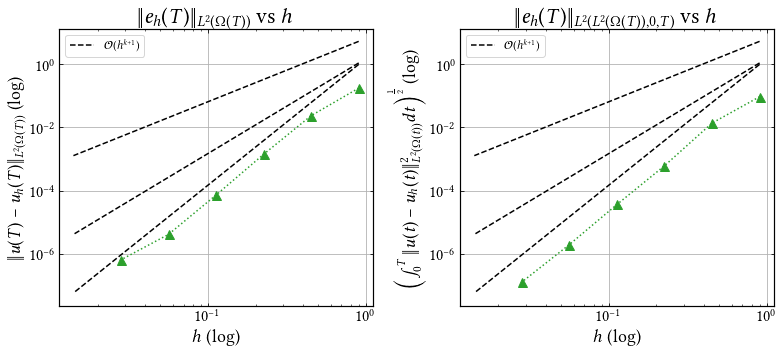

In [6]:
# paper.cpp

# # N = 5, T = 0.5, tau = 0.05          (N = 7, T = 0.5, tau = 0.05)
# error_conservative_P1P1_fullstab = 
# error_conservative_P1P1_fullstab_T =

# error_classical_P1P1_fullstab = 
# error_classical_P1P1_fullstab_T = 

# #error_classical_P1P1_macro = 
# #error_conservative_P1P1_macro =

# error_conservative_P2P2_fullstab = 
# error_conservative_P2P2_fullstab_T =

# error_classical_P2P2_fullstab = 
# error_classical_P2P2_fullstab_T = 

# N = 9 in space and time, tau = 0.05, D = 10
error_conservative_P3P3_fullstab = [0.1751377107155849, 0.02361574716599269, 0.001416953805128306, 7.315899334887579e-05, 4.168562591431295e-06, 6.560626891378176e-07]
error_conservative_P3P3_fullstab_T =  [0.0935033217979219, 0.01375295764454162, 0.0006145834266205686, 3.679127154719322e-05, 1.989842093386018e-06, 1.300546476556433e-07]




active_mesh = [2, 9, 20, 78, 282, 1073]



error_classical_P3P3_fullstab = [0.178952, 0.0705313, 0.00319115, 0.000124745, 6.3232e-06, 3.18756e-07] 
error_classical_P3P3_fullstab_T = [0.10192, 0.0324531, 0.00164659, 5.79062e-05, 3.05755e-06, 1.53552e-07]


h = [0.9, 0.45, 0.225, 0.1125, 0.05625, 0.028125, 0.0140625]
dT = [0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625]
nx = [4, 7, 14, 27, 54, 107, 214, 427]
ny = [4, 7, 14, 27, 54, 107, 214, 427]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

ax1.loglog(h, 6.5*np.power(h, 2), linestyle="--", color="black")   
ax1.loglog(h, 1.5*np.power(h, 3), linestyle="--", color="black")   
ax1.loglog(h, 1.5*np.power(h, 4),label=r"$\mathcal{O}(h^{k+1})$", linestyle="--", color="black")   

# ax1.loglog(h, error_conservative_P1P1_fullstab, marker='o', markersize=9, linestyle=":", color="C3")
# ax1.loglog(h, error_classical_P1P1_fullstab, label= r"$k=m=1$", marker='o', markersize=9, linestyle="-", color="C3")

# ax1.loglog(h, error_conservative_P2P2_fullstab, marker='s', markersize=9, linestyle=":", color="C0")
# ax1.loglog(h, error_classical_P2P2_fullstab, label= r"$k=m=2$", marker='s', markersize=9, linestyle="-", color="C0")

ax1.loglog(h[:6], error_conservative_P3P3_fullstab, marker='^', markersize=9, linestyle=":", color="C2")
#ax1.loglog(h[:6], error_classical_P3P3_fullstab, label= r"$k=m=3$", marker='^', markersize=9, linestyle="-", color="C2")

#ax1.set_ylim(1e-4, 2)
#ax1.set_yticks([1e-8, 1e-6, 1e-4, 1e-2, 1e0])
ax1.set_xlabel(r"$h$ (log)")
ax1.tick_params(axis='both', which='major')
ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{L^2(\Omega(T))}$ (log)")
ax1.set_title(r"$\|e_h(T)\|_{L^2(\Omega(T))}$ vs $h$")
ax1.legend()
ax1.grid()

ax2.loglog(h, 6.5*np.power(h, 2), linestyle="--", color="black")   
ax2.loglog(h, 1.5*np.power(h, 3), linestyle="--", color="black")   
ax2.loglog(h, 1.5*np.power(h, 4),label=r"$\mathcal{O}(h^{k+1})$", linestyle="--", color="black")   

# ax2.loglog(h, error_conservative_P1P1_fullstab_T, marker='o', markersize=9, linestyle=":", color="C3")
# ax2.loglog(h, error_classical_P1P1_fullstab_T, label= r"$k=m=1$", marker='o', markersize=9, linestyle="-", color="C3")

# ax2.loglog(h, error_conservative_P2P2_fullstab_T, marker='s', markersize=9, linestyle=":", color="C0")
# ax2.loglog(h, error_classical_P2P2_fullstab_T, label= r"$k=m=2$", marker='s', markersize=9, linestyle="-", color="C0")

ax2.loglog(h[:6], error_conservative_P3P3_fullstab_T, marker='^', markersize=9, linestyle=":", color="C2")
#ax2.loglog(h[:6], error_classical_P3P3_fullstab_T, label= r"$k=m=3$", marker='^', markersize=9, linestyle="-", color="C2")

ax2.set_xlabel(r"$h$ (log)")
ax2.tick_params(axis='both', which='major')
ax2.set_ylabel(r"\Big($\int_0^T\|u(t)-u_h(t)\|^2_{L^2(\Omega(t))}dt\Big)^{\frac{1}{2}}$ (log)")
ax2.set_title(r"$\|e_h(T)\|_{L^2(L^2(\Omega(T)), 0, T)}$ vs $h$")
ax2.legend()
ax2.grid()
fig.tight_layout()
plt.show()

### P3

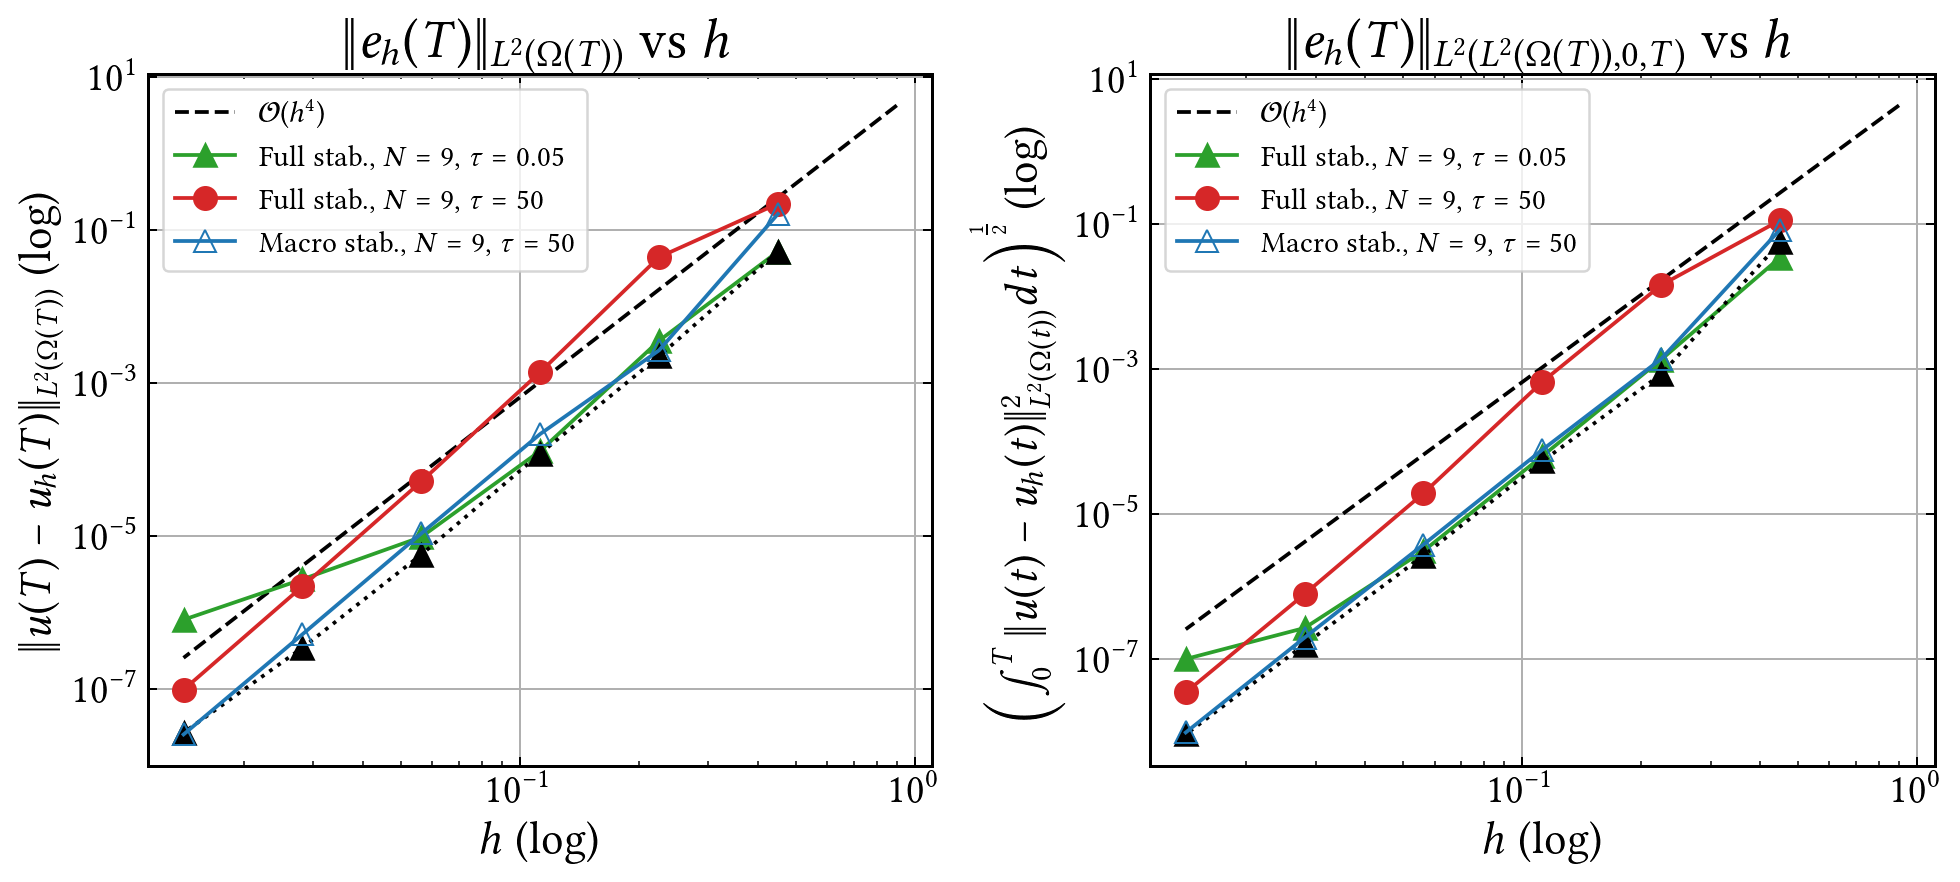

In [12]:
# classical with same mesh as above (same as in Lehrenfelds paper) and with N=9 space & time, P2quad 
error_classical_P3P3_fullstab = [0.178325528217856, 0.05229872840897468, 0.003564189247300313, 0.0001292324015907654, 6.19993935760981e-06, 3.303333643934042e-07, 1.81483498892827e-08]
error_classical_P3P3_fullstab_T = [0.1015171229457153, 0.03404335462275743, 0.001332102383047849, 6.212872805788408e-05, 2.961929990613256e-06, 1.583174498132536e-07, 8.642296048661413e-09]


# rerunning with beta exact 
#error_conservative_P3P3_fullstab = ### terminal was killed but it was exactly like the above
#error_conservative_P3P3_fullstab_T = ### terminal was killed but it was exactly like the above

# rerunning with beta exact and original domain
#error_conservative_P3P3_fullstab = [0.17812, 0.0522642, 0.00356433, 0.000129045, 9.68056e-06, 2.70486e-06]   
#error_conservative_P3P3_fullstab_T = [0.101522, 0.0340443, 0.00133207, 6.21314e-05, 3.05506e-06, 2.64819e-07] 
#nb_active_elements = ### ross screen 134753.pts-2.ross (killed)

# rerunning with N=14 in time and N=9 in space, beta = P0quad and tau=0.05 (Fuck this was on the Example 3 mesh using Example3::R0 etc... and fucked up by parallel)
# error_conservative_P3P3_fullstab = [0.1791273478231521, 0.07053116019834374, 0.003191150551830357, 0.0001248363768286654, 6.754451898837258e-06, 4.110675146722323e-07]
# error_conservative_P3P3_fullstab_T = [0.03772295839571738, 0.02649206575668251, 0.0007360720193343385, 2.853532179016198e-05, 1.504289861579254e-06, 8.528395464161896e-08]

# doing above again.. (rerunning with N=14 in time and N=9 in space, beta = P0quad and tau=0.05 
# error_conservative_P3P3_fullstab = [0.1781020254810474, 0.05225915062547705, 0.00356421993701218, 0.0001292763498791855, 6.47622562298045e-06, 1.288427985623953e-06]
# error_conservative_P3P3_fullstab_T = [0.101523176633384, 0.03404434733352005, 0.001332087461368785, 6.213668799987077e-05, 2.972968927745563e-06, 1.676111501814246e-07]

# # rerunning with N=14 in time and N=5 in space, beta = P0quad and tau=0.05
# error_conservative_P3P3_fullstab = [0.1868995233847733, 0.07048726702154523, 0.003200783498799771, 0.0001248763955040864, 6.764456295641687e-06, 4.16624630033087e-07]
# error_conservative_P3P3_fullstab_T = [0.1029278267884057, 0.03242935798207935, 0.001648318316116851, 5.793929543324433e-05, 3.070586408758764e-06, 1.715999797092991e-07]

# # rerunning with N=14 in time and N=5 in space, beta = P2quad and tau=0.05
# error_conservative_P3P3_fullstab = [0.1763758305108998, 0.05155323173998781, 0.003559951606669123, 0.0001295459556190795, 6.508043542787653e-06, 1.309195951005456e-06]
# error_conservative_P3P3_fullstab_T = [0.1024839361016894, 0.03395595401969241, 0.00133299791789543, 6.219771669258607e-05, 2.979873033310063e-06, 1.762305858579815e-07]


# running with N=14 in time, N=5 in space, beta = P0quad and tau=0.05 but with stabilization of mass matrix in lastquad using tau=tau1/10000
# error_conservative_P3P3_fullstab =  [0.1761720629301505, 0.05288432829984351, 0.003794762180828167, 0.0001364231552453792, 6.712536446057492e-06, 1.305921823931484e-06]
# error_conservative_P3P3_fullstab_T = [0.101152159455431, 0.03430510339943142, 0.001939791419777143, 6.434664677618464e-05, 3.058508735964604e-06, 1.696096142219493e-07]

# running with N=14 in time, N=5 in space, beta = P0quad and tau=0.05 but with stabilization of mass matrix in first quad using tau=tau1/10000
# error_conservative_P3P3_fullstab = [0.1761640486598434, 0.05282868099814251, 0.003787637181331056, 0.0001362124406418598, 6.705663292405887e-06, 1.304731768881709e-06]
# error_conservative_P3P3_fullstab_T = [0.1011518961443256, 0.03430464586553075, 0.001939751714685535, 6.434574839429475e-05, 3.058478670221229e-06, 1.696089565645089e-07]

# conclusion from the above two: there is not qualitative difference between stabilizing the mass matrix in the last or first time quadrature points,
# hence it seems like this is not a good solution 

### try stabilizing in itq=0

### exact Neumann condition, N=9 in space and time
# error_conservative_P3P3_fullstab = [0.1781201141030459, 0.05226421178156902, 0.003564331817726098, 0.0001290447403406007, 9.68056240029167e-06, 2.704863654452539e-06]
# error_conservative_P3P3_fullstab_T = [0.1015221914312615, 0.03404425715205159, 0.001332074738793409, 6.213144173526279e-05, 3.055058107586987e-06, 2.648193430778231e-07]



active_mesh = [2, 9, 20, 78, 282, 1073]



# error_classical_P3P3_fullstab = [0.178952, 0.0705313, 0.00319115, 0.000124745, 6.3232e-06, 3.18756e-07] 
# error_classical_P3P3_fullstab_T = [0.10192, 0.0324531, 0.00164659, 5.79062e-05, 3.05755e-06, 1.53552e-07]

### N=9 in time, but dT = h/5 
#error_conservative_P3P3_fullstab = [0.1781201141032618, 0.05236828285071919, 0.002531807904139531, 0.0001246314960162013, 8.127226385725325e-06, 2.037770456230245e-06, 4.870248545283136e-08]
#error_conservative_P3P3_fullstab_T = [0.1015221914312981, 0.03403350097736819, 0.00124649071796089, 6.072551666938643e-05, 2.902872642326007e-06, 1.948837275887673e-07, 4.128515608289123e-08]
dT = [0.25, 0.1, 0.04545454545454546, 0.02272727272727273, 0.01136363636363636, 0.005681818181818182, 0.002824858757062147]
active_mesh = [2, 6, 23, 80, 287, 1066, 4114]





h_ = [0.9, 0.45, 0.225, 0.1125, 0.05625, 0.028125, 0.01988737822087165]  
h = [0.9, 0.45, 0.225, 0.1125, 0.05625, 0.028125, 0.0140625]
dT = [0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625]
nx = [4, 7, 14, 27, 54, 107, 214, 427]
ny = [4, 7, 14, 27, 54, 107, 214, 427]


#print(convergence_rate(error_conservative_P3P3_fullstab, h_))
#print(convergence_rate(error_conservative_P3P3_fullstab_T, h_))
# print(convergence_rate(error_conservative_P3P3_macro, h_[:6]))
# print(convergence_rate(error_conservative_P3P3_macro_T, h_[:6]))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

ax1.loglog(h, 6.5*np.power(h, 4),label=r"$\mathcal{O}(h^4)$", linestyle="--", color="black")   

#ax1.loglog(h, error_classical_P3P3_fullstab, label= r"$k=m=3$", marker='^', markersize=9, linestyle="-", color="C2")

#ax1.set_ylim(1e-4, 2)
#ax1.set_yticks([1e-8, 1e-6, 1e-4, 1e-2, 1e0])
ax1.set_xlabel(r"$h$ (log)")
ax1.tick_params(axis='both', which='major')
ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{L^2(\Omega(T))}$ (log)")
ax1.set_title(r"$\|e_h(T)\|_{L^2(\Omega(T))}$ vs $h$")

ax1.grid()

ax2.loglog(h, 6.5*np.power(h, 4),label=r"$\mathcal{O}(h^4)$", linestyle="--", color="black")   

#ax2.loglog(h, error_classical_P3P3_fullstab_T, label= r"$k=m=3$", marker='^', markersize=9, linestyle="-", color="C2")

# N = 9 in space and time, tau = 0.05
# error_conservative_P3P3_fullstab = [0.179127, 0.0705314, 0.00319118, 0.000125414, 8.38267e-06, 1.49585e-06, 2.746358086669124e-07]  
# error_conservative_P3P3_fullstab_T = [0.10193, 0.0324531, 0.00164659, 5.80023e-05, 3.10688e-06, 3.37947e-07, 1.440369730083868e-07] 
# ax1.loglog(h_, error_conservative_P3P3_fullstab, marker='^', markersize=9, linestyle=":", color="C2")
# ax2.loglog(h_, error_conservative_P3P3_fullstab_T, marker='^', markersize=9, linestyle=":", color="C2")

# N = 9 in space and time, tau = 0.05 
error_conservative_P3P3_fullstab = [0.05226421178157441, 0.003564331817721629, 0.0001290447403334119, 9.680562381874145e-06, 2.704863659076748e-06, 7.998775435065999e-07]
error_conservative_P3P3_fullstab_T = [0.03404425715205232, 0.001332074738793098, 6.213144173550896e-05, 3.055058107584358e-06, 2.648193429525144e-07, 9.877413566832538e-08]
ax1.loglog(h[1:], error_conservative_P3P3_fullstab, marker='^', label=r"Full stab., $N=9$, $\tau=0.05$", markersize=9, linestyle="-", color="C2")
ax2.loglog(h[1:], error_conservative_P3P3_fullstab_T, marker='^', label=r"Full stab., $N=9$, $\tau=0.05$", markersize=9, linestyle="-", color="C2")


### N = 9 in time, but dT = h/7 instead of h/3.6 
# error_conservative_P3P3_fullstab = [0.1804723171197701, 0.05240787796781377, 0.002526969680557932, 0.0001241793126791524, 5.962396808114739e-06, 4.940453322206899e-07, 1.86845166198353e-08]
# error_conservative_P3P3_fullstab_T = [0.101229394513254, 0.03403186858547366, 0.001244158158248288, 5.959425840794874e-05, 2.840929704312544e-06, 1.599258178790714e-07, 2.085929012490267e-08]
# # dT = [0.1666666666666667, 0.07142857142857142, 0.03333333333333333, 0.01612903225806452, 0.008064516129032258, 0.004032258064516129, 0.002016129032258064]
# # active_mesh = [2, 6, 23, 76, 287, 1060, 4104]
# ax1.loglog(h, error_conservative_P3P3_fullstab, marker='^', markersize=9, linestyle=":", color="C2")
# ax2.loglog(h, error_conservative_P3P3_fullstab_T, marker='^', markersize=9, linestyle=":", color="C2")

### N = 9 in time, tau=0.5
# error_conservative_P3P3_fullstab = [0.1925433570362043, 0.08813908989340213, 0.008982671976903105, 0.0002719464290043007, 1.343292592547154e-05, 1.514739238643835e-06, 1.90142083800219e-07]
# error_conservative_P3P3_fullstab_T = [0.1075039203311431, 0.06526836880315703, 0.003134566085920708, 0.0001208057083519394, 5.216052681845826e-06, 2.593334020994629e-07, 3.713890119478935e-08]
# ax1.loglog(h, error_conservative_P3P3_fullstab, marker='^', markersize=9, linestyle=":", color="C2")
# ax2.loglog(h, error_conservative_P3P3_fullstab_T, marker='^', markersize=9, linestyle=":", color="C2")

### N = 9 in time, tau=50 
error_conservative_P3P3_fullstab_tau50 = [0.2212049277692722, 0.04420862257622565, 0.00138569277610549, 5.149217298450676e-05, 2.185233719614702e-06, 9.733056949019071e-08]
error_conservative_P3P3_fullstab_T_tau50 = [0.1111147229210301, 0.01419632902359847, 0.0006574713741294052, 1.907968196770843e-05, 7.768987563972367e-07, 3.419559560527935e-08]
ax1.loglog(h[1:], error_conservative_P3P3_fullstab_tau50, marker='o', label=r"Full stab., $N=9$, $\tau=50$", markersize=9, linestyle="-", color="C3")
ax2.loglog(h[1:], error_conservative_P3P3_fullstab_T_tau50, marker='o', label=r"Full stab., $N=9$, $\tau=50$", markersize=9, linestyle="-", color="C3")


### N=9, tau=0.05, scale h^-5/2 
# error_conservative_P3P3_fullstab = [0.178232, 0.0565617, 0.0050533, 0.000189588, 1.16711e-05, 1.81411e-06]
# error_conservative_P3P3_fullstab_T = [0.101668, 0.0390775, 0.00181398, 8.686e-05, 4.28324e-06, 2.45667e-07]
# ax1.loglog(h[:6], error_conservative_P3P3_fullstab, marker='^', markersize=9, linestyle=":", color="C2")
# ax2.loglog(h[:6], error_conservative_P3P3_fullstab_T, marker='^', markersize=9, linestyle=":", color="C2")


### rerunning with N=14 in time and N=9 in space, beta = P2quad and tau=0.05  
# error_conservative_P3P3_fullstab = [0.179127, 0.0705312, 0.00319115, 0.000124836, 6.75445e-06, 4.11068e-07, 8.331761036959897e-08]   
# error_conservative_P3P3_fullstab_T = [0.10193, 0.0324531, 0.00164661, 5.79214e-05, 3.06099e-06, 1.69188e-07, 5.304546882034097e-08]  
# ax1.loglog(h_, error_conservative_P3P3_fullstab, marker='^', markersize=9, linestyle=":", color="C2")
# ax2.loglog(h_, error_conservative_P3P3_fullstab_T, marker='^', markersize=9, linestyle=":", color="C2")

### running with N=20 in time, N=9 in space, P2quad and tau=0.05 
# error_conservative_P3P3_fullstab = [0.05225739632080715, 0.003564210901302134, 0.0001292396833578107, 6.207150108922914e-06, 3.892211241714399e-07, 7.792539156024118e-08, 3.228673646926916e-08]#[0.1780958513119261, 0.05225739632080715, 0.003564210901302134, 0.0001292396833578107, 6.207150108922914e-06, 3.892211241714399e-07, 7.792539156024118e-08]
# error_conservative_P3P3_fullstab_T = [0.03404437728122361, 0.001332101374960156, 6.212710484585288e-05, 2.964744352592603e-06, 1.591631431287138e-07, 3.92069794456633e-08, 1.207765420416801e-08]#[0.1015235102908024, 0.03404437728122361, 0.001332101374960156, 6.212710484585288e-05, 2.964744352592603e-06, 1.591631431287138e-07, 3.92069794456633e-08]
# condition_number = [1.610194e+11,3.162067e+11,9.739627e+11,7.666288e+11,0,1.290818e+10] # 2nd to last inf
# active_mesh = [2, 6, 23, 80, 291, 1068, 2081]
# h__ = [0.9, 0.45, 0.225, 0.1125, 0.05625, 0.028125, 0.01988737822087165, 0.0140625]
# ax1.loglog(h__[1:], error_conservative_P3P3_fullstab, label=r"Full stab., $N=20$, $\tau=0.05$", marker='^', markersize=9, linestyle="-", color="C5")
# ax2.loglog(h__[1:], error_conservative_P3P3_fullstab_T, label=r"Full stab., $N=20$, $\tau=0.05$", marker='^', markersize=9, linestyle="-", color="C5")

###! running N=20, tau=0.5 on ross screen
# error_conservative_P3P3_fullstab = 
# error_conservative_P3P3_fullstab_T = 
# condition_number = 

### N=20 in time, delta = 0.3
# error_conservative_P3P3_macro = [0.178096, 0.0307816, 0.00149524, 8.55268e-05, 4.55083e-06, 4.42095e-07, 2.61243e-07]    
# error_conservative_P3P3_macro_T = [0.101524, 0.0263322, 0.000639544, 3.96361e-05, 2.08832e-06, 1.25024e-07, 3.42723e-08]
# ax1.loglog(h_, error_conservative_P3P3_macro, marker='^', markersize=9, linestyle=":", color="black")
# ax2.loglog(h_, error_conservative_P3P3_macro_T, marker='^', markersize=9, linestyle=":", color="black")

### N = 20, macro but delta=0.5, dT as in Lehrenfelds 
# error_conservative_P3P3_macro = [0.03078155132047854, 0.001762978196945326, 9.064454914630866e-05, 4.866398743464991e-06, 4.595722889794405e-07, 8.35364527638258e-08]
# error_conservative_P3P3_macro_T = [0.02633223090682169, 0.0006787828733889029, 4.310763425085895e-05, 2.251390234262962e-06, 1.386860453991593e-07, 1.398916903534565e-08]
# ax1.loglog(h[1:], error_conservative_P3P3_macro, marker='^', markersize=9, linestyle=":", color="black")
# ax2.loglog(h[1:], error_conservative_P3P3_macro_T, marker='^', markersize=9, linestyle=":", color="black")

### N = 20, macro delta=0.5, tau=0.5 
error_conservative_P3P3_macro = [0.05215024277096915, 0.002235735814608502, 0.0001192399379091621, 5.686230641006412e-06, 3.441723599641923e-07, 2.67005184386387e-08]
error_conservative_P3P3_macro_T = [0.05514830609549674, 0.0008359955183906395, 5.268700293379363e-05, 2.637261009466224e-06, 1.566493718088954e-07, 9.002730399646656e-09]
ax1.loglog(h[1:], error_conservative_P3P3_macro, marker='^', markersize=9, linestyle=":", color="black")
ax2.loglog(h[1:], error_conservative_P3P3_macro_T, marker='^', markersize=9, linestyle=":", color="black")

### N = 9, macro delta=0.5, tau=50 
# error_conservative_P3P3_macro = [0.162187020455966, 0.002669633669397476, 0.0002148492184705196, 1.076962098410611e-05, 5.160734378937686e-07, 2.529893794417898e-08]
# error_conservative_P3P3_macro_T = [0.08264461404444388, 0.001361087188707255, 7.590428729793507e-05, 3.743629824801343e-06, 1.949686058696923e-07, 9.592361854166874e-09]
# ax1.loglog(h[1:], error_conservative_P3P3_macro, label=r"Macro stab., $N=9$, $\tau=50$", marker='^', markersize=9, linestyle="-", markeredgewidth=0.8, markerfacecolor="None", color="C0")
# ax2.loglog(h[1:], error_conservative_P3P3_macro_T, label=r"Macro stab., $N=9$, $\tau=50$", marker='^', markersize=9, linestyle="-", markeredgewidth=0.8, markerfacecolor="None", color="C0")


ax2.set_xlabel(r"$h$ (log)")
ax2.tick_params(axis='both', which='major')
ax2.set_ylabel(r"\Big($\int_0^T\|u(t)-u_h(t)\|^2_{L^2(\Omega(t))}dt\Big)^{\frac{1}{2}}$ (log)")
ax2.set_title(r"$\|e_h(T)\|_{L^2(L^2(\Omega(T)), 0, T)}$ vs $h$")
ax1.legend()
ax2.legend()
ax2.grid()
fig.tight_layout()
plt.show()